# Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Data  and dataframe 

In [13]:
train = pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
test=pd.read_csv('Uniqlo(FastRetailing) 2017 Test - stocks2017.csv')


In [14]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [15]:
test.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000


### dataframe info

In [16]:
train.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [17]:
test.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


## preprocessing

In [19]:
train["Date"] = pd.to_datetime(train["Date"])

In [20]:
train["day"] = train["Date"].dt.day
train["month"] = train["Date"].dt.month
train["year"] = train["Date"].dt.year
train =  train.drop("Date", axis=1)

In [21]:
test["Date"] = pd.to_datetime(test["Date"])
test["day"] = test["Date"].dt.day
test["month"] = test["Date"].dt.month
test["year"] = test["Date"].dt.year
test = test.drop("Date", axis=1)

In [22]:
train.head()

,Open,High,Low,Close,Volume,Stock Trading,day,month,year
0,42120,42330,41700,41830,610000,25628028000,30,12,2016
1,43000,43220,42540,42660,448400,19188227000,29,12,2016
2,43940,43970,43270,43270,339900,14780670000,28,12,2016
3,43140,43700,43140,43620,400100,17427993000,27,12,2016
4,43310,43660,43090,43340,358200,15547803000,26,12,2016


# visualization

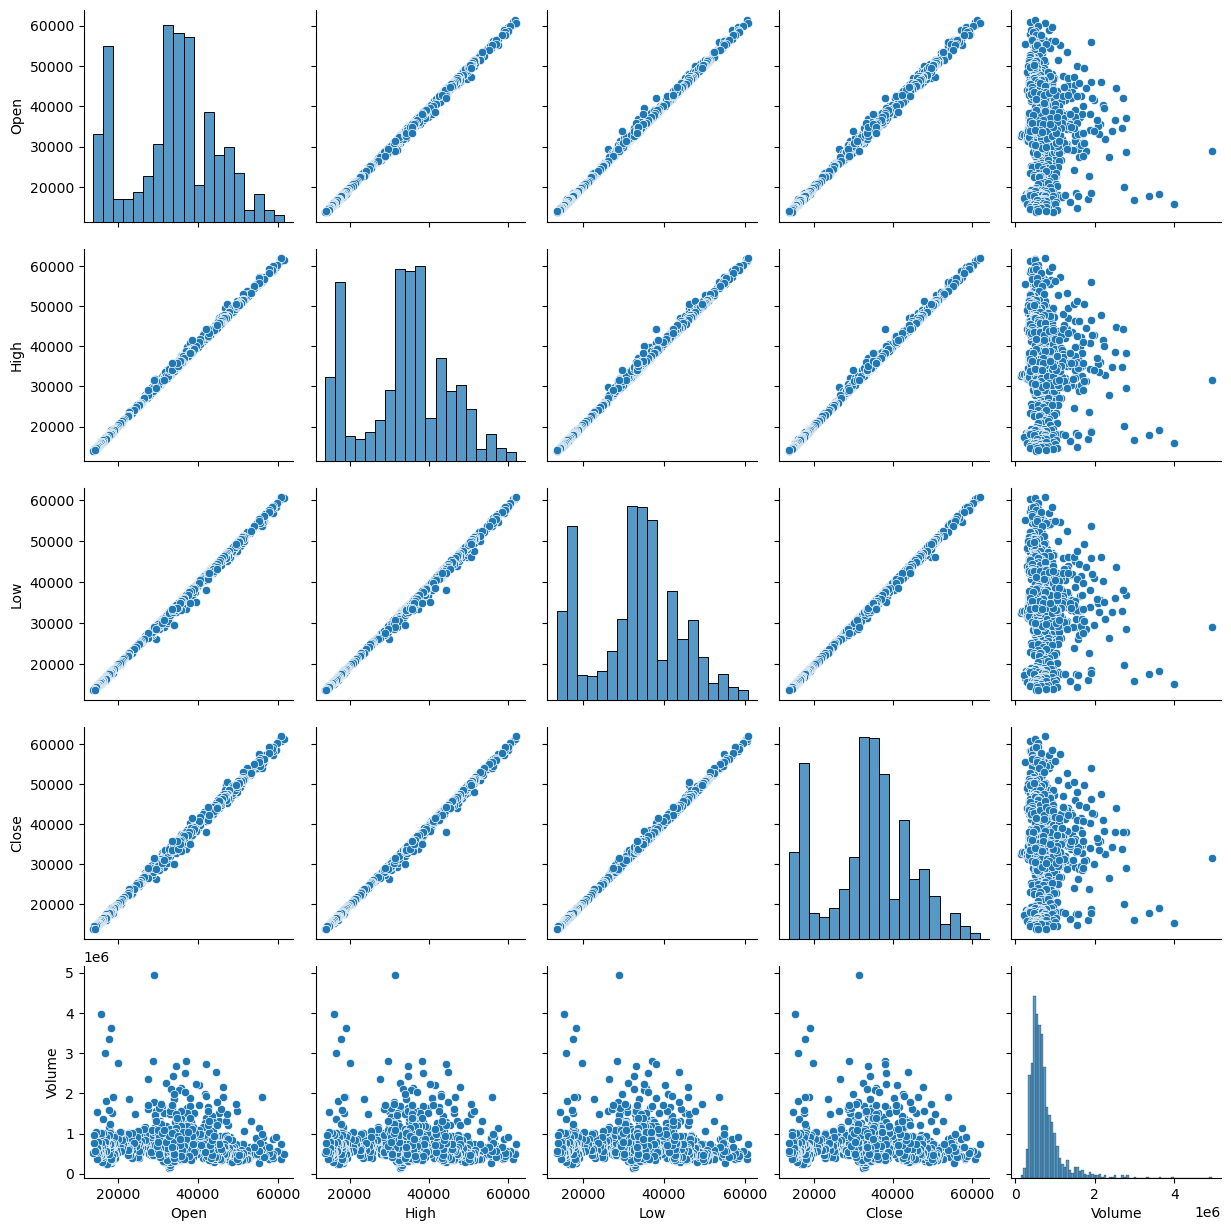

In [23]:
sns.pairplot(train[["Open","High","Low","Close","Volume"]] )
# plt.tight_layout()

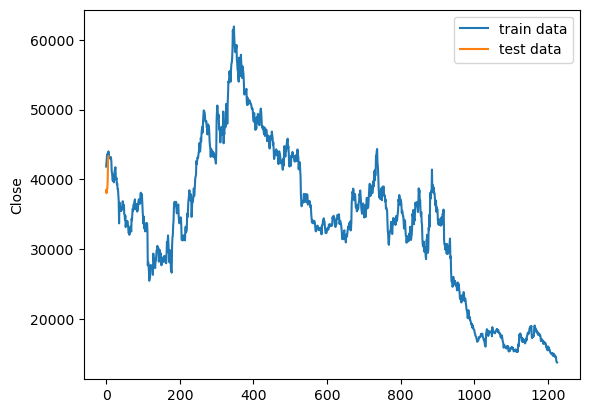

In [24]:
sns.lineplot(train["Close"], label="train data")
sns.lineplot(test["Close"], label="test data")
plt.show()

<Axes: xlabel='Open', ylabel='Close'>

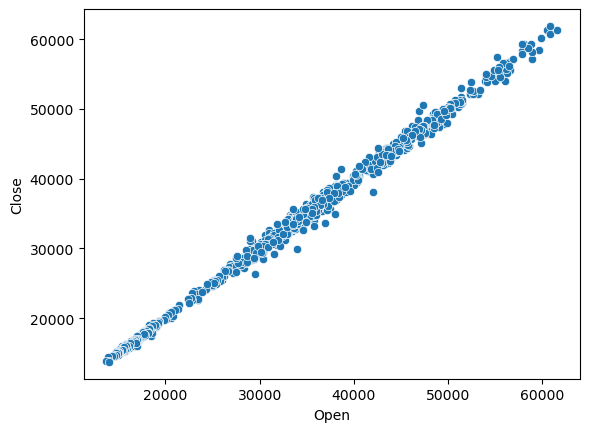

In [25]:
sns.scatterplot(x=train["Open"],y= train["Close"])

<Axes: >

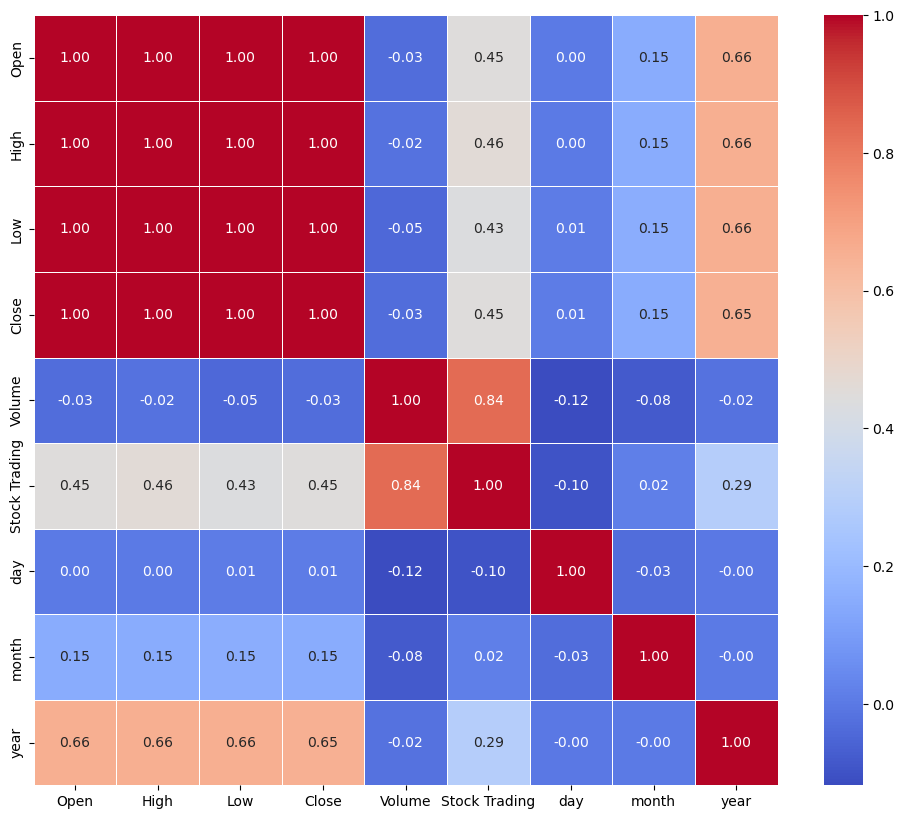

In [26]:
plt.figure(figsize=(12,10))
train.corr()
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

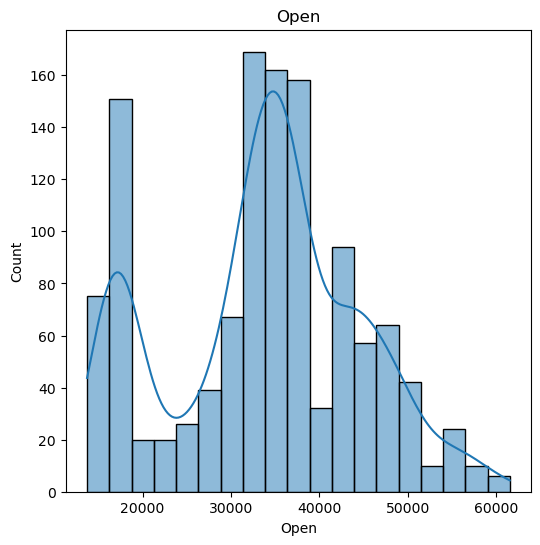

In [27]:
plt.figure(figsize=(6,6))
sns.histplot(train["Open"],kde=True)
plt.title('Open')
plt.show()

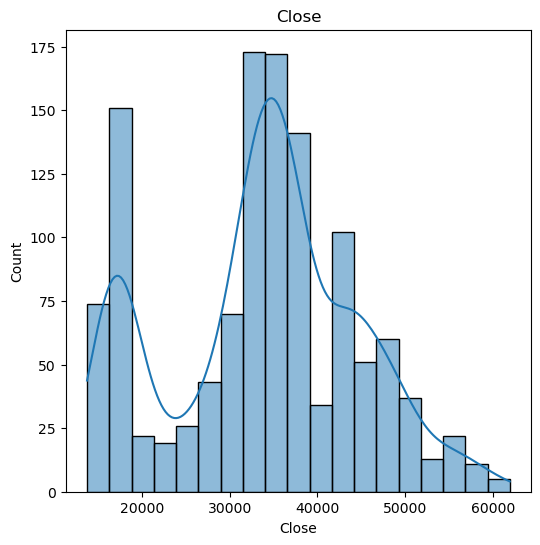

In [28]:
plt.figure(figsize=(6,6))
sns.histplot(train["Close"],kde=True)
plt.title('Close')
plt.show()

# spliting

In [29]:
X_train = train.drop(columns=["Close"])
y_train = train["Close"]
X_test = test.drop(columns=["Close"])
y_test = test["Close"]

In [30]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")

shape of X_train: (1226, 8)
shape of X_test: (7, 8)


# model training

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [33]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
pred = rf.predict(X_test)
print(f"r2 score {rf}: {r2_score(y_test, pred)}" )
print(f"mean squared error : {mean_squared_error(y_test, pred)}")

r2 score RandomForestRegressor(): 0.9724891838804157
mean squared error : 109073.64857142835


<Axes: ylabel='Close'>

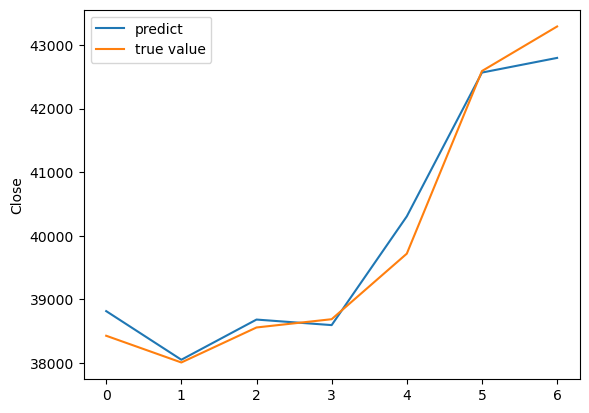

In [35]:
sns.lineplot(pred, label = "predict")
sns.lineplot(y_test, label = "true value")

### xgbooster

In [46]:
!pip install xgboost

In [47]:
from xgboost import XGBRegressor

In [48]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
x_pred = xg.predict(X_test)
print(f"r2 score of xgb : {r2_score(y_test, x_pred)}")
print(f"mse: {mean_squared_error(y_test, x_pred)}")

r2 score of xgb : 0.9788834452629089
mse: 83722.04349408831


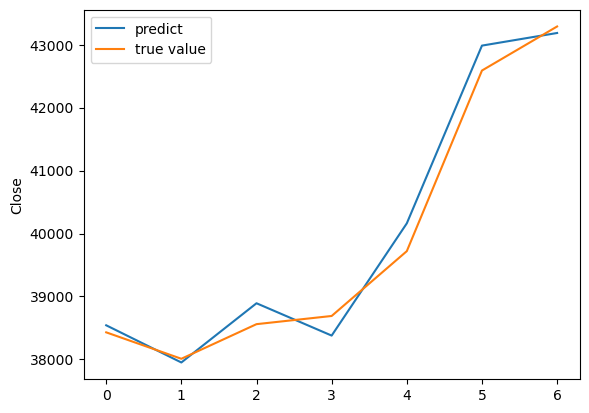

In [49]:
sns.lineplot(x_pred, label = "predict")
sns.lineplot(y_test, label = "true value")
plt.show()